<a href="https://colab.research.google.com/github/anhtruong1209/Deep-Learning/blob/master/Cat_or_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nối Colab vô Drive 

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Đi đến thư mục chứa data

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Dog_Or_Cat

/content/drive/MyDrive/Colab Notebooks/Dog_Or_Cat


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

--2021-06-07 07:24:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.187.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M  38.7MB/s    in 1.7s    

2021-06-07 07:24:37 (38.7 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
main_folder = './'
!unzip -q cats_and_dogs_filtered.zip -d $main_folder

replace ./cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./cats_and_dogs_filtered/validation/dogs/dog.2127.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./cats_and_dogs_filtered/validation/dogs/dog.2126.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./cats_and_dogs_filtered/validation/dogs/dog.2125.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./cats_and_dogs_filtered/validation/dogs/dog.2124.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./cats_and_dogs_filtered/validation/dogs/dog.2123.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
cd cats_and_dogs_filtered

/content/drive/My Drive/Colab Notebooks/Dog_Or_Cat/cats_and_dogs_filtered


In [ ]:
train_folder = './train'

In [ ]:
valid_folder = './validation'

### [TODO 1] Xây dựng mô hình Deep Learning

In [ ]:
train_dogs_dir = 'train/dogs'
train_cats_dir = 'train/cats'
validation_dogs_dir = 'validation/dogs'
validation_cats_dir = 'validation/cats'

In [ ]:
import tensorflow as tf 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape = (150,150,3)),                   
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
 summary_model = model.summary()
 summary_model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001),metrics=['acc'])

In [ ]:
#data processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'binary'    
)

Found 2000 images belonging to 2 classes.


In [ ]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'binary'    
)

Found 1000 images belonging to 2 classes.


### [TODO 2] Thực hiện training

In [ ]:
import tensorflow as tf

DESIRED_ACCURACY = 0.7

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>DESIRED_ACCURACY):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch =8,
    epochs=15,
    verbose=1,
    callbacks=[callbacks],
    validation_data = generated_valid_data,
    validation_steps = 8
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 35s 678ms/step - loss: 2.6673 - acc: 0.4902 - val_loss: 0.6922 - val_acc: 0.5059
Epoch 2/15
8/8 [==============================] - 5s 652ms/step - loss: 0.6844 - acc: 0.5391 - val_loss: 0.6670 - val_acc: 0.6074
Epoch 3/15
8/8 [==============================] - 5s 670ms/step - loss: 0.6870 - acc: 0.5879 - val_loss: 0.6720 - val_acc: 0.6230
Epoch 4/15
8/8 [==============================] - 5s 669ms/step - loss: 0.6902 - acc: 0.5547 - val_loss: 0.6837 - val_acc: 0.5859
Epoch 5/15
8/8 [==============================] - 5s 638ms/step - loss: 0.6732 - acc: 0.6055 - val_loss: 0.6598 - val_acc: 0.5508
Epoch 6/15
8/8 [==============================] - 5s 650ms/step - loss: 0.7060 - acc: 0.5819 - val_loss: 0.7845 - val_acc: 0.5371
Epoch 7/15
8/8 [==============================] - 5s 641ms/step - loss: 0.7601 - acc: 0.5879 - val_loss: 0.6651 - val_acc: 0.6602
Epoch 8/15
8/8 [==============================] - 5s 641ms/step - loss: 0.6553 - acc: 0.6

In [ ]:
model.save("dogs_or_cat.h5")

### [TODO 3] Thực hiện load file và dự đoán

In [ ]:
saved_model = tf.keras.models.load_model("dogs_or_cat.h5")

Saving download (6).jfif to download (6).jfif
(1, 150, 150, 3)
[0.46414512]
download (6).jfif is a cats


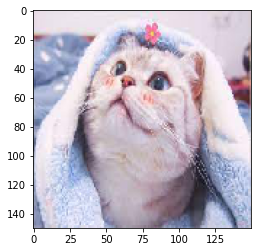

In [ ]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
    path = "./" + fn 
    img= image.load_img(path , target_size=(150,150))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    plt.imshow(images.reshape(150,150,3))
    print(images.shape)

    classes = saved_model.predict(images, batch_size=64)
    print(classes[0])
    if classes[0] >= 0.5:
        print(fn+" is dogs")
    else:
        print(fn+" is a cats")   

### Hiển thị độ chính xác của mô hình

Text(0.5, 1.0, 'Training and validation loss')

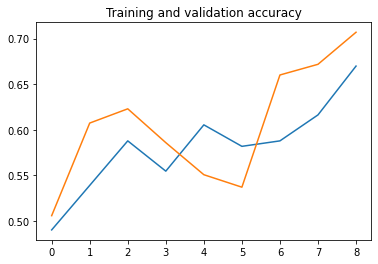

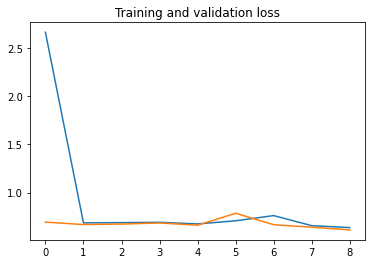

In [ ]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )